# Exploratory Analysis of the Data

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import scipy.stats as ss
import statistics as stats
import seaborn as sns 
from pandas.plotting import autocorrelation_plot

## Maximum and minimum identification

We upload the csv first of all, eliminating the column 'Unnamed: 0', later we print the total shape of the the csv. We therefore print the names of the final columns present in the data. We also delete all the columns tht didnt have numbers.

In [13]:
data = pd.read_csv("pacientes_progresores_2021.csv")
patient_data= data.drop(['Unnamed: 0','diabetes','estatus_glucemico_inicio','estatus_glucemico_final','progresores','sexo'], axis=1) 
print(patient_data.shape)

(2016, 21)


In [14]:
patient_data.columns
columns = list(patient_data.columns)
#columns

In order to see theminimum and the maximum of each variable, we use the .describe() command. 

In [15]:
patient_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
edad,2016.0,56.022321,13.976797,14.000000,48.000000,57.000000,65.000000,90.000000
peso,2016.0,83.007540,16.820210,45.000000,71.000000,81.000000,92.000000,166.000000
talla,2016.0,162.735615,10.187865,136.000000,155.000000,162.000000,170.000000,195.000000
IMC,2016.0,31.264633,5.586401,16.800000,27.500000,30.400000,34.000000,59.200000
TAS,2016.0,141.324901,13.875522,104.000000,132.000000,141.000000,149.000000,246.000000
TAD,2016.0,79.782242,9.038528,53.000000,74.000000,80.000000,85.000000,124.000000
LDL,1983.0,132.922844,32.676805,42.000000,111.000000,132.000000,153.000000,276.000000
HDL,1993.0,63.575013,17.433854,6.000000,51.000000,61.000000,73.000000,168.000000
trigl,2012.0,178.102386,120.429645,26.000000,108.750000,147.500000,208.000000,1600.000000
Hbglic,1725.0,6.335826,1.247909,4.000000,5.600000,5.900000,6.500000,13.400000


In [16]:
patient_data.describe()['edad'][['min','max']]

min    14.0
max    90.0
Name: edad, dtype: float64

A list with maximum and minimum values was created, using the columns with the numeric values (the non-numeric values were deleted). Every variable's maximum, minimum and data is associated to an element in the list. 

In [17]:
max_min_list=[]
for el in columns:
    max_min_list.append(patient_data.describe()[el][['min','max']])

In [18]:
max_min_list[1]

min     45.0
max    166.0
Name: peso, dtype: float64

## Outliers identification using boxplots. 

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. Boxplot will be used in order to identify them. 

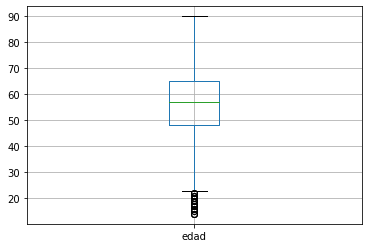

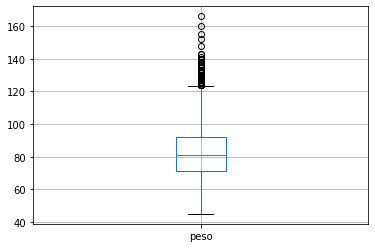

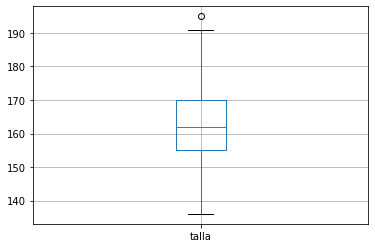

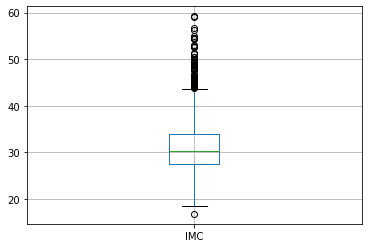

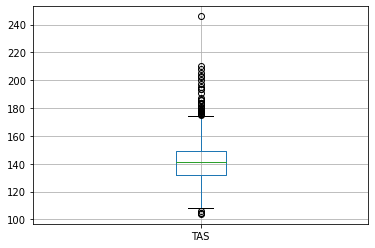

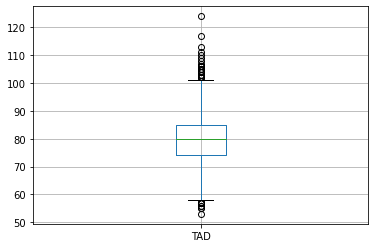

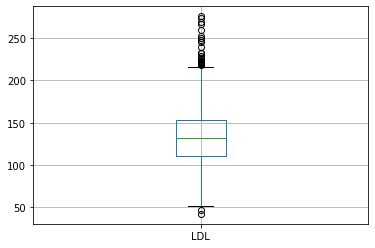

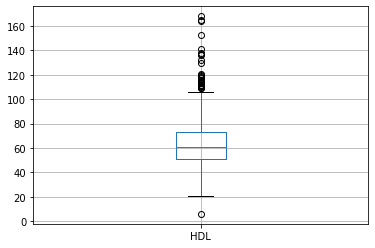

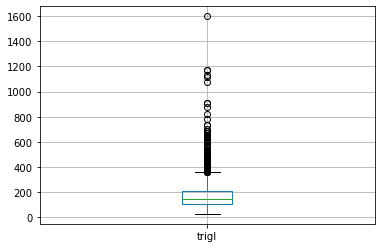

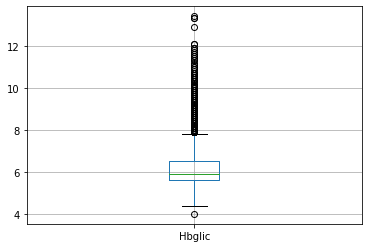

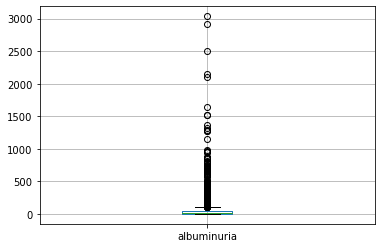

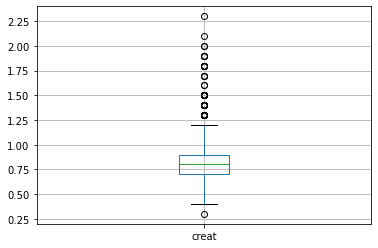

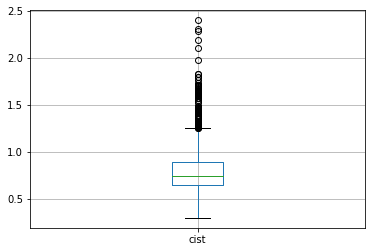

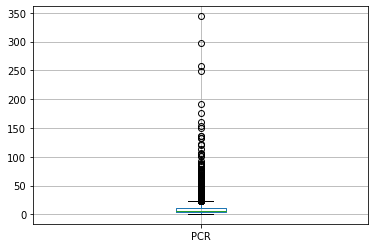

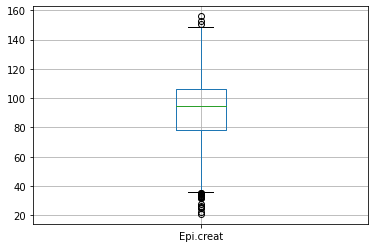

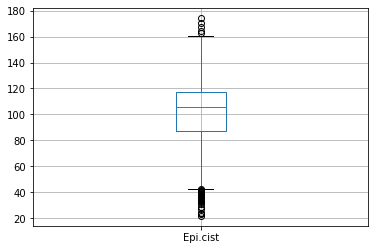

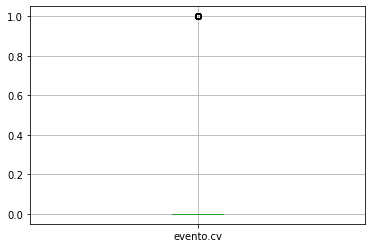

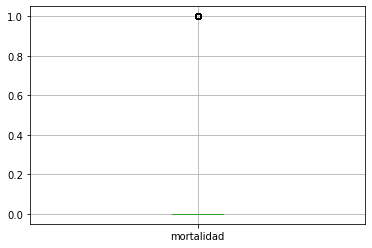

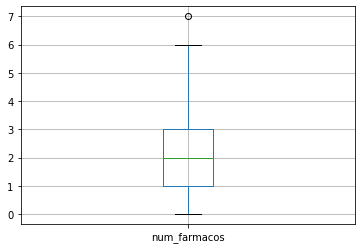

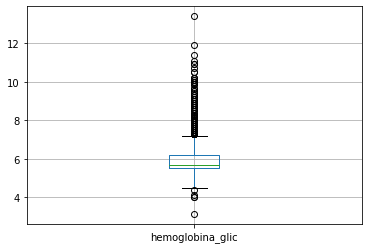

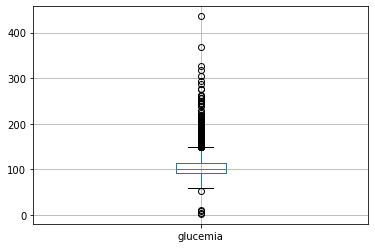

In [19]:
for i in columns:
    patient_data.boxplot(column=i)
    plt.show()

The binary variables are: 'evento.cv' and 'mortalidad'. This values only give 0 or 1.

## Comparison of Hbglic and hemoglobina_glic

I will represent both in order to see the distribution of the different values through the csv.

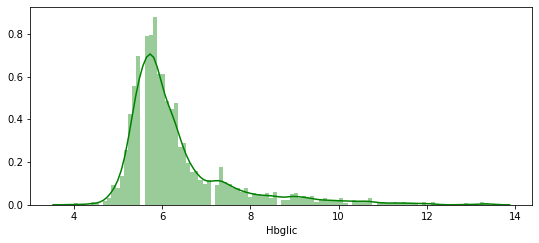

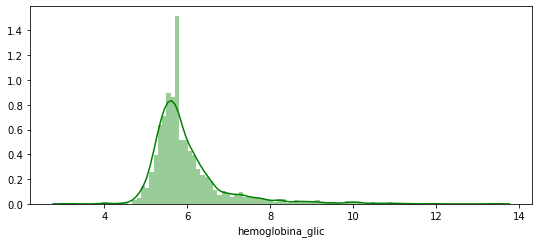

In [39]:
#print(patient_data['Hbglic'].describe())

plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)
sns.distplot(patient_data['Hbglic'], color='g', bins=100, hist_kws={'alpha': 0.4});

#print(patient_data['hemoglobina_glic'].describe())

plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 2)
sns.distplot(patient_data['hemoglobina_glic'], color='g', bins=100, hist_kws={'alpha': 0.4});

Distribution already appears to be different for each value. Let's check the values for each patient.

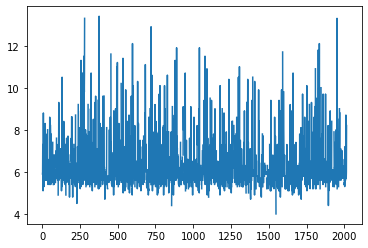

In [51]:
plt.plot(patient_data['Hbglic'])

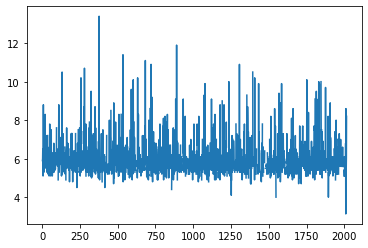

In [52]:
plt.plot(patient_data['hemoglobina_glic'])

It appears to be different in each patient.

## Histogram for number of drugs.

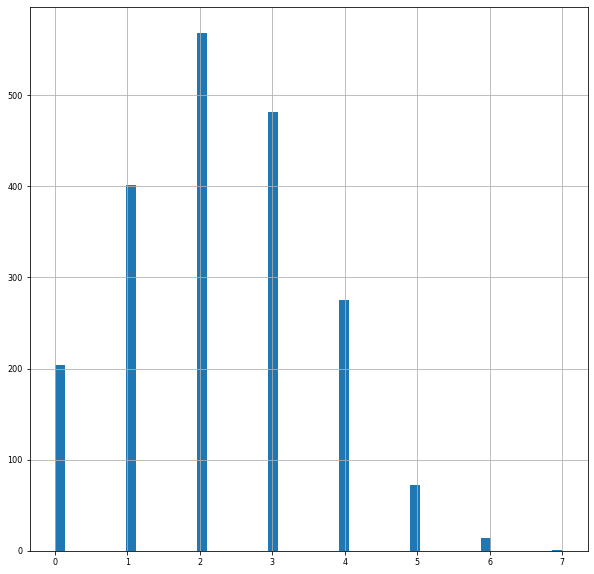

In [55]:
patient_data['num_farmacos'].hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)

## Changing the outliers into NaN

In order to change the outlier values into **NaN** we need to apply the knowledge of the clinician that defines the values for each variable. The values obtained as. reference are obtained from a document sent by the physician. 

In [ ]:
#AGE
for i in patient_data['edad']:
    if i < 20  or  i > 90:
        patient_data['edad']= patient_data['edad'].replace({i: np.nan})
        
#WEIGHT
for i in patient_data['peso']:
    if i < 50  or  i > 180:
        patient_data['peso']= patient_data['peso'].replace({i: np.nan})
        
#SIZE
for i in patient_data['talla']:  #preguntar a oscar
    if i < 120  or  i > 210:
        patient_data['talla']= patient_data['talla'].replace({i: np.nan})
        
#IMC 
for i in patient_data['IMC']:
    if i < 20  or  i > 35:
        patient_data['IMC']= patient_data['IMC'].replace({i: np.nan})
        
#TAS
for i in patient_data['TAS']:
    if i < 90  or  i > 220:
        patient_data['TAS']= patient_data['TAS'].replace({i: np.nan})
        
#TAD
for i in patient_data['TAD']:
    if i < 40  or  i > 150:
        patient_data['TAD']= patient_data['TAD'].replace({i: np.nan})
        
#LDL
for i in patient_data['LDL']:
    if i < 10  or  i > 200:
        patient_data['LDL']= patient_data['LDL'].replace({i: np.nan})
        
#HDL
for i in patient_data['HDL']:
    if i < 15  or  i > 100:
        patient_data['HDL']= patient_data['HDL'].replace({i: np.nan})

#trigl
for i in patient_data['trigl']:
    if i < 50  or  i > 750:
        patient_data['trigl']= patient_data['trigl'].replace({i: np.nan})
        
#Hbglic 
for i in patient_data['Hbglic']:
    if i < 2  or  i > 15:
        patient_data['Hbglic']= patient_data['Hbglic'].replace({i: np.nan})
        
#albuminuria 
for i in patient_data['albuminuria']:
    if i < 0  or  i > 3000:
        patient_data['albuminuria']= patient_data['albuminuria'].replace({i: np.nan})

        
#creat 
for i in patient_data['creat']:
    if i < 0.3  or  i > 4:
        patient_data['creat']= patient_data['creat'].replace({i: np.nan})
        
#cist 
for i in patient_data['cist']:
    if i < 0.3  or  i > 4:
        patient_data['cist']= patient_data['cist'].replace({i: np.nan})

        
#PCR 
for i in patient_data['PCR']:
    if i < 3  or  i > 200:
        patient_data['PCR']= patient_data['PCR'].replace({i: np.nan})

#Epi.creat 
for i in patient_data['Epi.creat']:
    if i < 15  or  i > 160:
        patient_data['Epi.creat']= patient_data['Epi.creat'].replace({i: np.nan})

#Epi.cist 
for i in patient_data['Epi.cist']:
    if i < 15  or  i > 160:
        patient_data['Epi.cist']= patient_data['Epi.cist'].replace({i: np.nan})

#glucemia 
for i in patient_data['glucemia']:
    if i < 80  or  i > 350:
        patient_data['glucemia']= patient_data['glucemia'].replace({i: np.nan})


#problema con hemoglobina glic y hb glic ¿es lo mismo?
#evento cv y mortalidad solo 0 y 1
#num_farmacos??



## Boxplots and histograms organized by the labels.

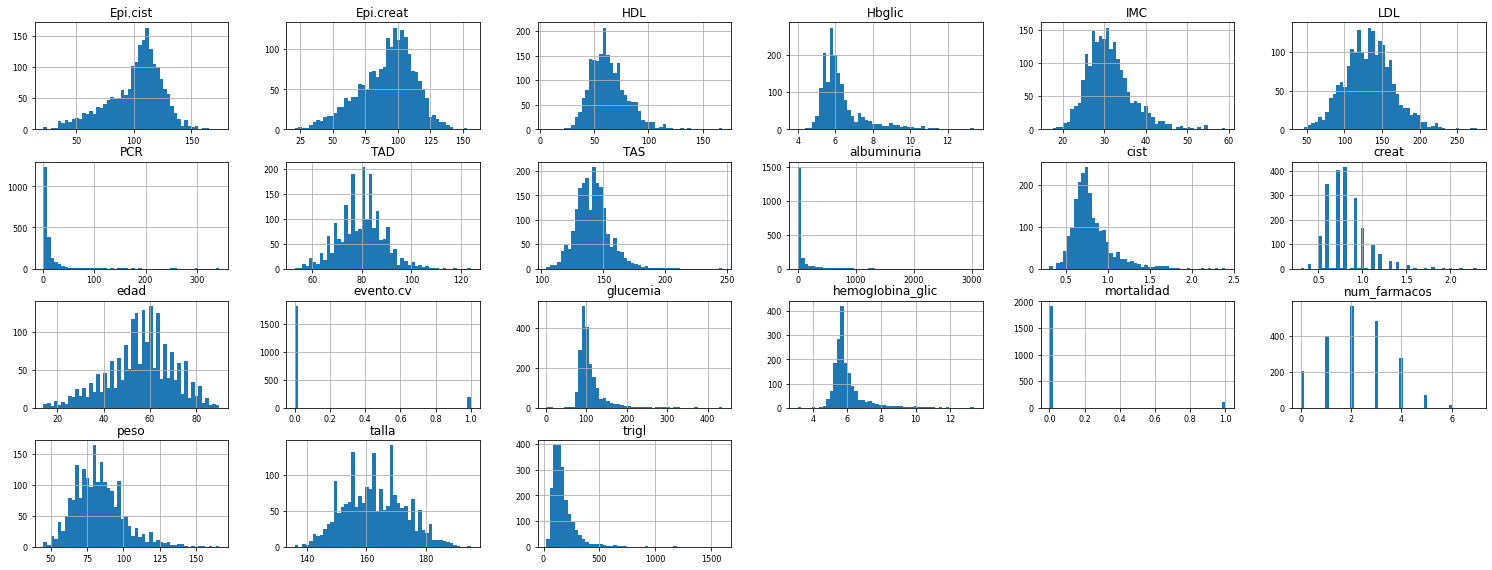

In [56]:
histograms = patient_data.hist(figsize=(26, 25), bins=50, xlabelsize=8, ylabelsize=8,layout = (10,6))

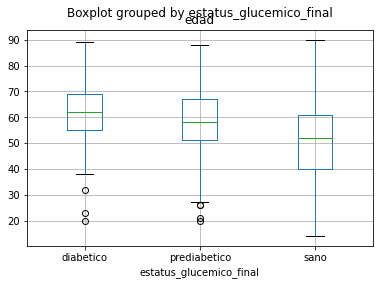

<Figure size 432x288 with 0 Axes>

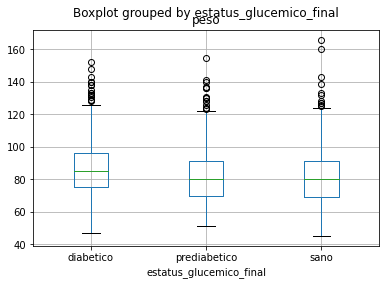

<Figure size 432x288 with 0 Axes>

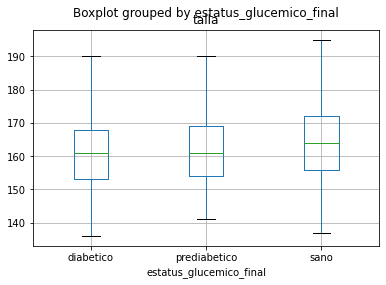

<Figure size 432x288 with 0 Axes>

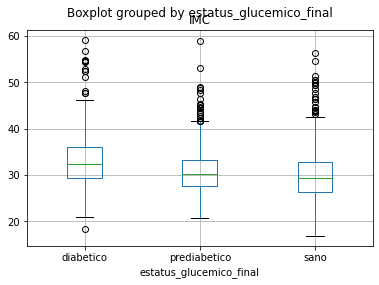

<Figure size 432x288 with 0 Axes>

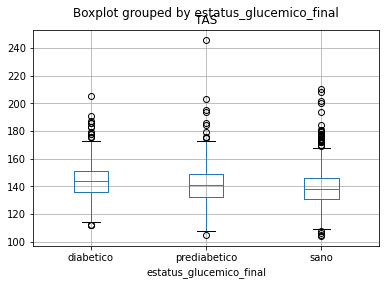

<Figure size 432x288 with 0 Axes>

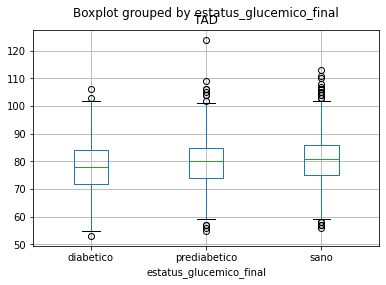

<Figure size 432x288 with 0 Axes>

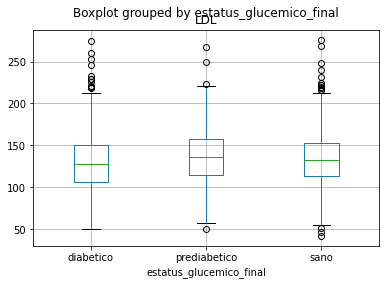

<Figure size 432x288 with 0 Axes>

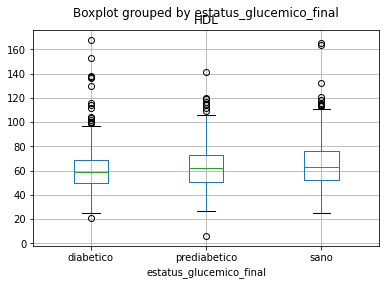

<Figure size 432x288 with 0 Axes>

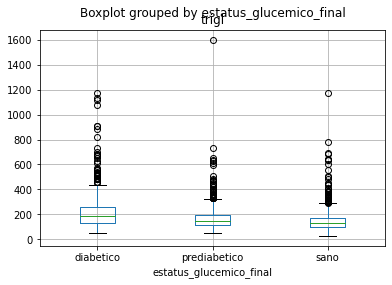

<Figure size 432x288 with 0 Axes>

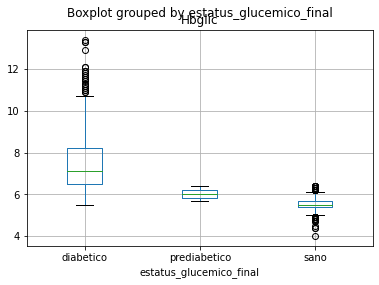

<Figure size 432x288 with 0 Axes>

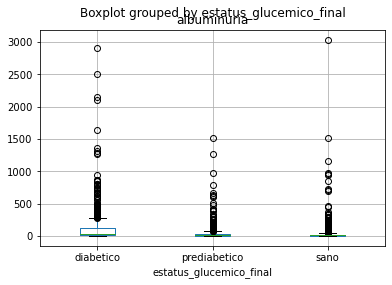

<Figure size 432x288 with 0 Axes>

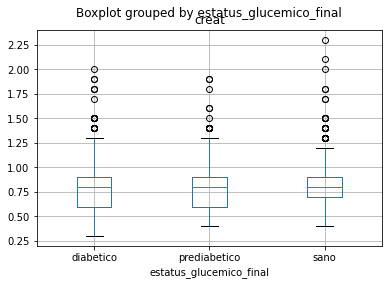

<Figure size 432x288 with 0 Axes>

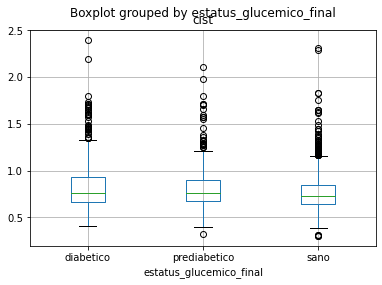

<Figure size 432x288 with 0 Axes>

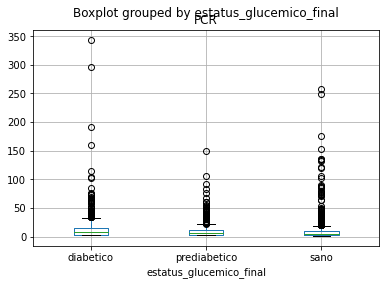

<Figure size 432x288 with 0 Axes>

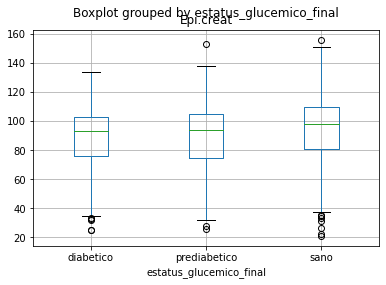

<Figure size 432x288 with 0 Axes>

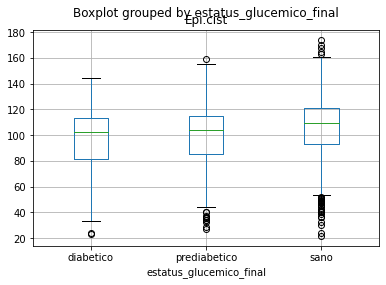

<Figure size 432x288 with 0 Axes>

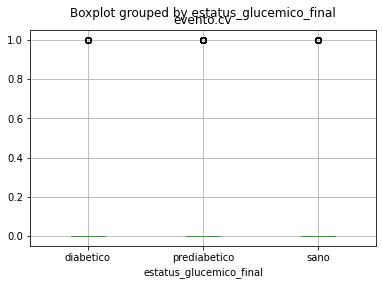

<Figure size 432x288 with 0 Axes>

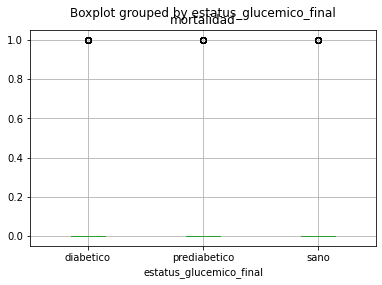

<Figure size 432x288 with 0 Axes>

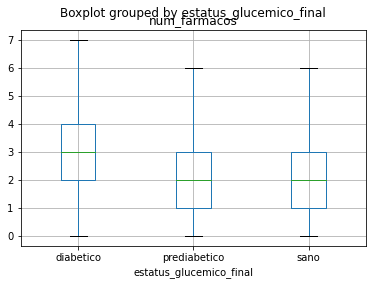

<Figure size 432x288 with 0 Axes>

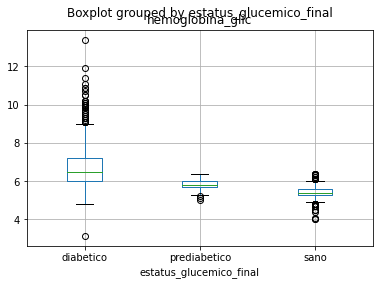

<Figure size 432x288 with 0 Axes>

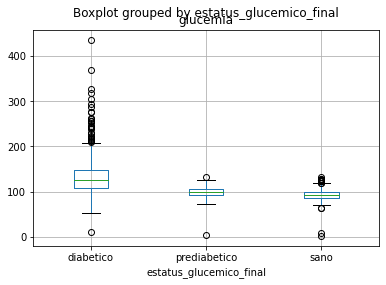

<Figure size 432x288 with 0 Axes>

In [58]:
plt.rcParams.update({'figure.max_open_warning': 0})
column_name=list(columns)
for i in column_name:
    data.boxplot(by='estatus_glucemico_final',column =i)
    plt.figure()